Final version of Figure 2 of paper for PNAS submission, joining 1951-1979 v 1980-2007 and 1980-1993 v 1994-2007 change subplots into a single master figure.

In [1]:
from itertools import chain
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import time
import os
from shutil import copy

%matplotlib inline

In [2]:
ferretpath = "/Users/Siwen/Desktop/ferret/bin"
rdapath = "APHRO_ZH_front_025deg_V1101."

In [3]:
## start by loading all precipitation data for each year.
P = np.zeros((365,80,72,57))
P_band = np.zeros((365,80,72,57))
P_local = np.zeros((365,80,72,57))

for yr in range(1951,2008):
    
    #Build filename
    filename = ferretpath + '/' + rdapath + str(yr) + '.nc'
    print(filename),
    myf = nc.Dataset(filename, 'r')
    
    #Obtain fraction of different types of rainfall
    P[:,:,:,yr-1951] = myf['P'][:365,:,:]
    P_band[:,:,:,yr-1951] = myf['P_band1'][:365,:,:] + myf['P_band2'][:365,:,:]
    P_local[:,:,:,yr-1951] = myf['P_leftover'][:365,:,:]
    
    myf.close()

/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1951.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1952.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1953.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1954.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1955.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1956.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1957.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1958.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1959.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1960.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1961.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1962.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1963.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1964.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_0

In [12]:
## streamline the code below
def decadal_change(precip,season,y1,y2):
    p1 = np.sum(np.mean(precip[season[0]-1:season[1],:,:,y1[0]-1951:y1[1]-1950], axis = 3), axis = 0)
    p2 = np.sum(np.mean(precip[season[0]-1:season[1],:,:,y2[0]-1951:y2[1]-1950], axis = 3), axis = 0)
    return p2-p1

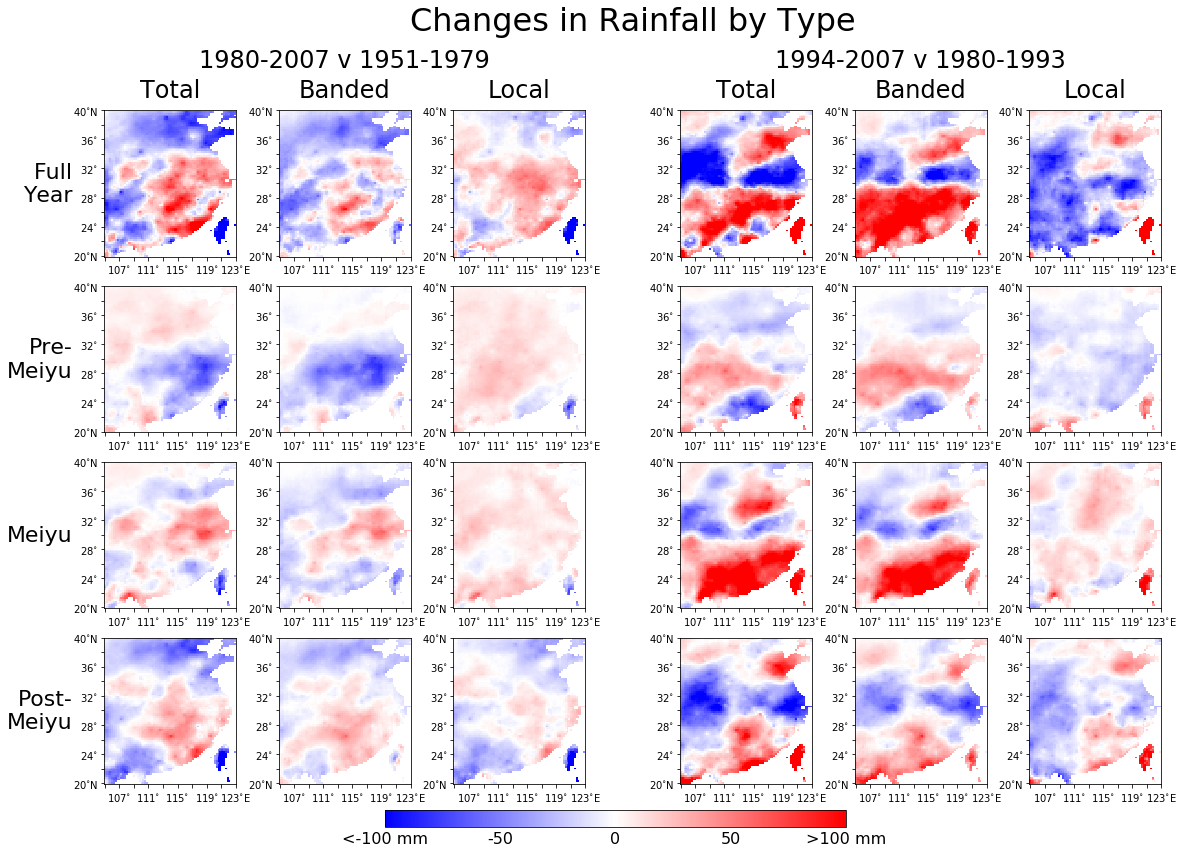

In [72]:
## PLOTTING
## Using gridspec, we create two separate 12-panel grids for comparisons of different time periods.
## left: 1980-2007 v 1951-1979
## right: 1994-2007 v 1980-1993
fig = plt.figure(figsize=(16,12), facecolor='w')
st = plt.suptitle("Changes in Rainfall by Type", size = 32, y=1, x=.515)

## create grids for left-hand and right-hand sides
grid_left = gridspec.GridSpec(4, 3)
grid_left.update(left=0.05, right=0.48)
grid_right = gridspec.GridSpec(4, 3)
grid_right.update(left=0.55, right=0.98)
grids = {'a':grid_left, 'b':grid_right}

## Define title for each half of the figure
panel_titles = {'a':'1980-2007 v 1951-1979','b':'1994-2007 v 1980-1993'}

## indices used later to refer to grid cells in same order as other lists
xgrid = [0,0,0,1,1,1,2,2,2,3,3,3]
ygrid = [0,1,2]*4
grid_ix = [ [x,y] for x,y in zip(xgrid,ygrid) ]

## create storage dict for axes objects for each side; a is left, b is right
axes = {'a':[], 'b':[]}

## Some variables overlap in order between the two figures; here, we set them up in proper sequence.
P_tuple = [P, P_band, P_local]*4
seasons = list(chain.from_iterable([[[1,365]]*3,[[121,160]]*3,[[161,200]]*3,[[201,273]]*3]))


## Some variables are not identical between the left and right-hand sides; left side is a and right side is b below

## Create year tuples - defines start and end year for inter-period comparisons.
years = {'a':[[1951,1979],[1980,2007]],'b':[[1980,1993],[1994,2007]]}
#year_selection = qq = 4*(3*['a']+3*['b'])

## lists of the characteristics for each subplot - what column is being plotted, title and labels.
titles = ["Total","Banded","Local"] + ['']*9

## Create x-axis labels (which include line break as \n)
season_names = ['Full\nYear','Pre-\nMeiyu','Meiyu','Post-\nMeiyu']
temp_labels = [ [s]+2*[''] for s in season_names ] 
ylabels = {'a':[x for y in temp_labels for x in y], 'b':['']*12}


## change x-axis and y-axis tick marks to be correct
xtickpos = np.linspace(0,72,10)
ytickpos = np.linspace(0,80,11)
xticklabels = ["","107$\!^\circ$","","111$\!^\circ$","","115$\!^\circ$","","119$\!^\circ$","","123$\!^\circ\!$E"]
yticklabels = ["20$\!^\circ\!$N","","24$\!^\circ$","","28$\!^\circ$","","32$\!^\circ$","","36$\!^\circ$","","40$\!^\circ\!$N"]


## Time to actually go and make plots!
## We run through entire loop twice, once for left-hand side, the second time for right-hand side.
## In each loop, we cycle through each of 12 subplots, one o

for half in ['a','b']:
    for ix, precip, season, title, ylabel in zip(grid_ix,P_tuple,seasons,titles,ylabels[half]):
        ax = plt.subplot(grids[half][ix[0],ix[1]])
        axes[half].append(ax)
        dc = decadal_change(precip,season,years[half][0],years[half][1])
        im = plt.imshow(dc, origin = 'lower', vmax=100, vmin=-100, cmap = 'bwr')
        ax.set_title(title, fontsize=24, y = 1.05)
        ax.set_ylabel(ylabel, fontsize=22, labelpad=0, rotation='horizontal',\
                      horizontalalignment='right',verticalalignment='center')
        ax.set_xticks(xtickpos)
        ax.set_xticklabels(xticklabels)
        ax.set_yticks(ytickpos)
        ax.set_yticklabels(yticklabels)
        ax.tick_params(axis='y', which='major', pad=2)
        
    ## add title to this half - place right above middle panel in top row
    pos = axes[half][1].get_position() # get the original position 
    xx = (pos.x0+pos.x1)/2
    yy = pos.y1+.05
    plt.figtext(xx,yy,panel_titles[half],horizontalalignment='center',size=24)

## Add colorbar to bottom of plot
fig.subplots_adjust(bottom=0.1)
fig.subplots_adjust(left=0.2)
cbar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.02])
cb = fig.colorbar(im, cax=cbar_ax, ticks=[-100, -50, 0, 50, 100], orientation='horizontal')
cb.ax.set_xticklabels(['<-100 mm', -50, 0, 50, '>100 mm'],size=16)  # horizontal colorbar
cb.ax.tick_params(length=0)